# RANDOMIZED CONTROLLED EXPERIMENTS  _  CAUSALITY

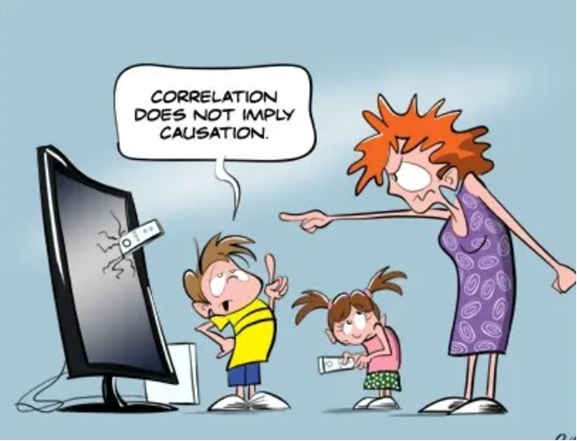

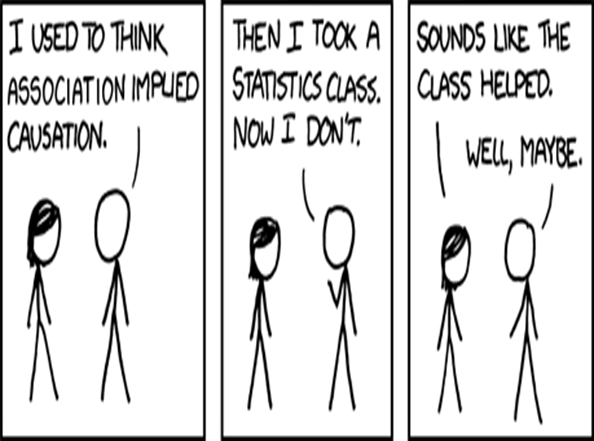

In [1]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from google.colab import files

In [2]:
#upload the file mammogram.csv
uploaded=files.upload()
#https://www.openintro.org/data/

Saving mammogram.csv to mammogram.csv


In [3]:
#Read the file mammogram.csv
mammogram = pd.read_csv('mammogram.csv')

In [5]:
# Lets view the mammogram dataset
mammogram

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes
...,...,...
89830,control,no
89831,control,no
89832,control,no
89833,control,no


In [6]:
#Determine the listings in the dataset
mammogram.groupby('treatment').size()

,0
treatment,
control,44910
mammogram,44925


In [7]:
#mammogram.groupby('breast_cancer_death').size()
mammogram.groupby('breast_cancer_death').size()

,0
breast_cancer_death,
no,88830
yes,1005


In [8]:
mammogram

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes
...,...,...
89830,control,no
89831,control,no
89832,control,no
89833,control,no


In [9]:
# convert the 'breast_cancer_death' column to an array
mammogram['breast_cancer_death'].values == 'yes'

array([ True,  True,  True, ..., False, False, False])

In [10]:
# Let create a new column based on the previous cell

mammogram['indicator'] = mammogram['breast_cancer_death'].values == 'yes'
mammogram

,treatment,breast_cancer_death,indicator
0,mammogram,yes,True
1,mammogram,yes,True
2,mammogram,yes,True
3,mammogram,yes,True
4,mammogram,yes,True
...,...,...,...
89830,control,no,False
89831,control,no,False
89832,control,no,False
89833,control,no,False


In [11]:
# Since  I really dont need the second column anymore, i guess it is cool to drop the column i.e 'breast_cancer_death'
mammogram = mammogram.drop('breast_cancer_death', axis=1)

In [12]:
#mammogram
mammogram

,treatment,indicator
0,mammogram,True
1,mammogram,True
2,mammogram,True
3,mammogram,True
4,mammogram,True
...,...,...
89830,control,False
89831,control,False
89832,control,False
89833,control,False


In [13]:
# mammogram.groupby('indicator').size()
mammogram.groupby('indicator').size()


,0
indicator,
False,88830
True,1005


In [14]:
mammogram.pivot_table(index='treatment', values='indicator')

,indicator
treatment,
control,0.011245
mammogram,0.011130


In [15]:
#Determine the mean of the death in treatment vs the control group
mean_table = mammogram.groupby('treatment').mean()
mean_table

,indicator
treatment,
control,0.011245
mammogram,0.011130


In [16]:
# So let us determine if this is significant, we could determine the difference between the two means

#What is the difference between the death rate for mammogram and control
observed_difference = mean_table.iloc[1,:]-mean_table.iloc[0,:]
observed_difference =observed_difference.to_numpy()[0]



In [19]:
observed_difference

-0.00011505110015988182

In [18]:
#Create a function to input a table, a label and group label. which would then determine the label difference grouped by the values in group label
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""

    reduced = table[[label, group_label]]

    mean_table = reduced.groupby(group_label).mean()
    means_difference = mean_table.iloc[1,:]-mean_table.iloc[0,:]

    return means_difference.to_numpy()[0]

In [20]:
#Let's test this function
difference_of_means(mammogram, 'indicator', 'treatment')

-0.00011505110015988182

In [24]:
#Create an array with treatment column being shuffled
shuffled_labels = np.random.permutation(mammogram['treatment'])
shuffled_labels

array(['mammogram', 'mammogram', 'mammogram', ..., 'control', 'mammogram',
       'mammogram'], dtype=object)

In [25]:
#Create a new table original_and_shuffled and add the shuffled labels as a column
original_and_shuffled = mammogram
original_and_shuffled['Shuffled Label'] = shuffled_labels
original_and_shuffled

,treatment,indicator,Shuffled Label
0,mammogram,True,mammogram
1,mammogram,True,mammogram
2,mammogram,True,mammogram
3,mammogram,True,mammogram
4,mammogram,True,mammogram
...,...,...,...
89830,control,False,mammogram
89831,control,False,mammogram
89832,control,False,control
89833,control,False,mammogram


In [26]:
#determine the difference mean in indicator for shuffled label
difference_of_means(original_and_shuffled,'indicator','Shuffled Label')

-0.00011505110015988182

In [27]:
#determine the difference mean in indicator for treatment
difference_of_means(original_and_shuffled,'indicator','treatment')

-0.00011505110015988182

In [28]:
#Let's put this all into a function
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""

    # array of shuffled labels
    shuffled_labels = np.random.permutation(table[group_label])

    # table of numerical variable and shuffled labels
    table['Shuffled Label'] = shuffled_labels

    return difference_of_means(table, label, 'Shuffled Label')

In [29]:
#Test this function
one_simulated_difference(mammogram, 'indicator','treatment')

0.00015210536078649577

In [30]:
#Let's run this multiple times
differences = []
for i in np.arange(50):
  new_difference = one_simulated_difference(mammogram, 'indicator','treatment')
  differences.append(new_difference)

In [31]:
# Diffrences
differences=np.array(differences)
differences

array([-1.59577177e-04,  1.85271303e-05, -2.51945925e-03, -5.15785792e-04,
        7.75470436e-04,  4.63787899e-04,  1.96631438e-04, -8.27468329e-04,
       -2.48629331e-04, -3.37681484e-04, -6.49364022e-04,  1.07579284e-04,
        1.04262690e-03, -2.59989465e-05, -2.93155407e-04, -1.59577177e-04,
        4.19261822e-04,  1.53241374e-03,  1.04262690e-03, -1.22820302e-03,
       -3.82207561e-04,  7.75470436e-04,  1.79957020e-03,  1.85271303e-05,
       -2.04103254e-04, -4.26733638e-04,  6.30532071e-05, -6.93890099e-04,
        1.57693982e-03,  3.30209668e-04,  3.74735745e-04, -8.27468329e-04,
        6.41892206e-04,  1.85271303e-05, -1.31725517e-03, -1.05009871e-03,
       -1.59577177e-04, -1.15051100e-04,  6.86418283e-04,  2.85683591e-04,
       -2.04103254e-04, -2.04103254e-04,  6.41892206e-04, -5.60311868e-04,
       -2.48629331e-04, -1.13915087e-03, -7.82942253e-04,  1.52105361e-04,
       -2.93155407e-04,  2.41157514e-04])

Observed Difference: -0.00011505110015988182


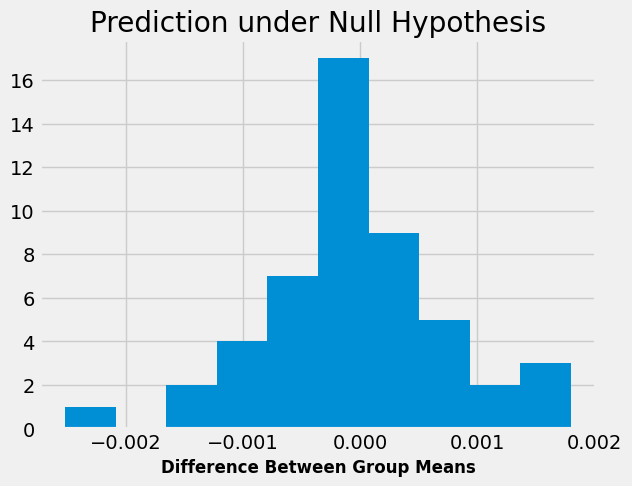

In [32]:
#Let's plot the distribution from the results above

#plots.figure(figsize=(10, 6))
table = pd.DataFrame({'Difference Between Group Means' : differences})
table.hist('Difference Between Group Means')


plots.title('Prediction under Null Hypothesis')
plots.xlabel('Difference Between Group Means', fontsize=12 ,fontweight='bold')





print('Observed Difference:', observed_difference)


#P-value

In [34]:
np.count_nonzero(differences <=   observed_difference)/50

0.52